In [19]:
import pandas as pd
from sklearn.preprocessing import Normalizer, LabelEncoder
import xgboost as xgb

In [20]:
from libs.predictor_util import make_classification, plot_confusion_matrix, analysing_feature_importance
from libs.transformer_utils import process_features_standardisation

## 1. Load the Data set

In [21]:
df = pd.read_csv('../data/outputs/06_final_dataset.csv')

In [22]:
df.head()

,resultId,raceId,driverId,constructorId,grid,race_rank,statusId,year,round,circuitId,...,race_end_in_2019,race_end_in_2020,race_end_in_2021,race_end_in_2022,race_end_in_2023,driver_most_won_circuit_id,driver_nber_of_races_won,driver_nber_of_times_in_top_10,age,season_age
0,1,18,1,1,1,2,1,2008,1,1,...,21,16,21,19,12,14,63,292,39,23
1,2,18,2,2,5,3,1,2008,1,1,...,0,0,0,0,0,2,2,131,47,31
2,3,18,3,3,7,5,1,2008,1,1,...,0,0,0,0,0,3,20,158,39,23
3,4,18,4,4,11,7,1,2008,1,1,...,0,0,11,12,12,9,22,285,43,27
4,5,18,5,1,3,1,1,2008,1,1,...,0,0,0,0,0,1,2,37,43,27


#### Get only the data from 2005

In [23]:
df = df[df['year'] > 2005]

In [24]:
le = LabelEncoder()
df['race_rank'] = le.fit_transform(df['race_rank'])

## 2. Normalizing the year column

In [25]:
df.columns

Index(['resultId', 'raceId', 'driverId', 'constructorId', 'grid', 'race_rank',
       'statusId', 'year', 'round', 'circuitId', 'constructor_is_active',
       'constructor_races_won', 'constructor_avg_point',
       'constructor_times_in_top_10', 'driver_is_active', 'driver_avg_point',
       'driver_avg_speed', 'race_end_bf_2019', 'race_end_in_2019',
       'race_end_in_2020', 'race_end_in_2021', 'race_end_in_2022',
       'race_end_in_2023', 'driver_most_won_circuit_id',
       'driver_nber_of_races_won', 'driver_nber_of_times_in_top_10', 'age',
       'season_age'],
      dtype='object')

In [26]:
cols = ['year', 'driver_avg_speed', 'constructor_avg_point', 'driver_avg_point', 'constructor_races_won', 'race_end_bf_2019', 'race_end_in_2019', 'race_end_in_2020', 'race_end_in_2021', 'race_end_in_2022', 'race_end_in_2023', 'driver_nber_of_races_won', 'driver_nber_of_times_in_top_10', 'age']
df[cols] = process_features_standardisation(df, cols, Normalizer)

In [27]:
# df.boxplot(column=['driver_avg_speed'], return_type='axes')

In [28]:
df.drop(['raceId', 'resultId', 'statusId', 'constructor_races_won', 'constructor_avg_point', 'constructor_times_in_top_10'], axis=1, inplace=True)

In [29]:
df_val = df.iloc[:5]
df = df.iloc[5:]
df.head()


,driverId,constructorId,grid,race_rank,year,round,circuitId,constructor_is_active,driver_is_active,driver_avg_point,...,race_end_in_2019,race_end_in_2020,race_end_in_2021,race_end_in_2022,race_end_in_2023,driver_most_won_circuit_id,driver_nber_of_races_won,driver_nber_of_times_in_top_10,age,season_age
5,6,3,13,14,0.994774,1,1,1,0,0.000124,...,0.000000,0.000000,0.000000,0.0,0.0,0,0.000000,0.003468,0.019321,23
6,7,5,17,12,0.994849,1,1,0,0,0.000110,...,0.000000,0.000000,0.000000,0.0,0.0,0,0.000000,0.004459,0.022295,29
7,8,6,15,4,0.979127,1,1,1,0,0.002595,...,0.002926,0.002926,0.002438,0.0,0.0,1,0.020480,0.135556,0.021943,29
8,9,2,2,9,0.994001,1,1,0,0,0.001370,...,0.000990,0.000000,0.000495,0.0,0.0,7,0.000495,0.026731,0.019801,24
9,10,7,18,13,0.994918,1,1,0,0,0.000266,...,0.000000,0.000000,0.000000,0.0,0.0,12,0.000495,0.010901,0.020810,26


## 3. Apply the model model

In [30]:
target = 'race_rank'
id_col = 'resultId'
features = [x for x in df.columns if x not in [target, id_col]]

In [ ]:
xgb_model = xgb.XGBClassifier(
    n_estimators=205,
    learning_rate=0.001,
    max_depth=5,
    eta= 0.01,
    subsample= 0.8,
    colsample_bytree= 0.5,
    objective= 'multi:softmax',
    eval_metric='auc',
    booster='gbtree',
    min_child_weight = 1,
    gamma = 0,
    n_jobs=-1,
    num_class= 25,
    enable_categorical=True
)

Accuracy: 10.730088495575222

Model Report
Accuracy 2 : 0.1073
AUC Score (Train): 0.864196
AUC Score (Test): 0.732434


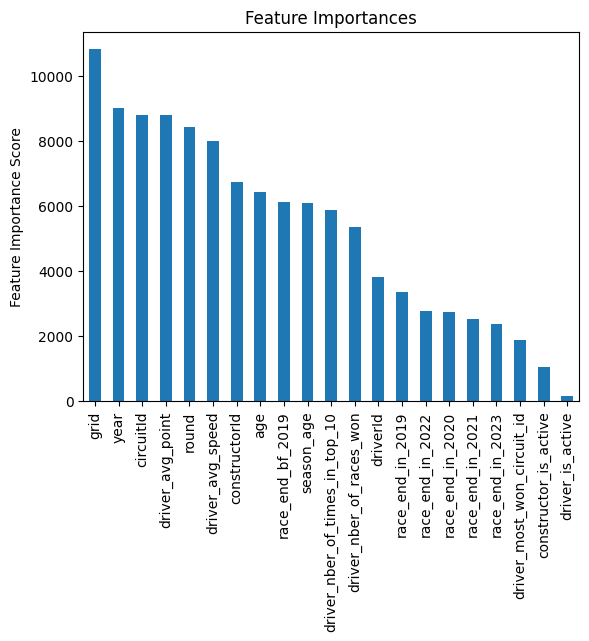

In [31]:
model = make_classification(df, features, target, xgb_model)

In [32]:
# model[0].get_booster().get_fscore()

In [33]:
# import xgboost as xgb

In [34]:
# xgtrain = xgb.DMatrix(df[features].values, label=df[target].values)

In [35]:
# xgb_params = model[0].get_params()
# cvresult = xgb.cv(xgb_params, xgtrain, num_boost_round=model[0].get_params()['n_estimators'], nfold=5,
#             metrics='auc', early_stopping_rounds=50)

In [36]:
print("Classification Report:")
print(model[4])

Classification Report:
              precision    recall  f1-score   support

           0       0.11      0.03      0.04        80
           1       0.15      0.41      0.22        66
           2       0.17      0.20      0.18        85
           3       0.14      0.19      0.16        81
           4       0.10      0.14      0.12        73
           5       0.02      0.01      0.01        90
           6       0.03      0.02      0.03        90
           7       0.12      0.12      0.12        78
           8       0.12      0.08      0.09        92
           9       0.03      0.01      0.02        72
          10       0.03      0.02      0.03        90
          11       0.11      0.12      0.11        86
          12       0.10      0.09      0.09        89
          13       0.07      0.04      0.05        91
          14       0.16      0.11      0.13        87
          15       0.07      0.06      0.07        81
          16       0.10      0.20      0.13        95
    

In [37]:
plot_confusion_matrix((model[1], model[2]))

In [38]:
analysing_feature_importance(model[0], model[3])

In [39]:
df_val

,driverId,constructorId,grid,race_rank,year,round,circuitId,constructor_is_active,driver_is_active,driver_avg_point,...,race_end_in_2019,race_end_in_2020,race_end_in_2021,race_end_in_2022,race_end_in_2023,driver_most_won_circuit_id,driver_nber_of_races_won,driver_nber_of_times_in_top_10,age,season_age
0,1,1,1,2,0.979019,1,1,1,1,0.006875,...,0.010239,0.007801,0.010239,0.009264,0.005851,14,0.030716,0.142367,0.019015,23
1,2,2,5,3,0.991990,1,1,0,0,0.000695,...,0.000000,0.000000,0.000000,0.000000,0.000000,2,0.000988,0.064717,0.023219,31
2,3,3,7,5,0.989246,1,1,1,0,0.003813,...,0.000000,0.000000,0.000000,0.000000,0.000000,3,0.009853,0.077839,0.019213,23
3,4,4,11,7,0.979935,1,1,0,1,0.002906,...,0.000000,0.000000,0.005368,0.005856,0.005856,9,0.010736,0.139084,0.020985,27
4,5,1,3,1,0.994276,1,1,1,0,0.000464,...,0.000000,0.000000,0.000000,0.000000,0.000000,1,0.000990,0.018321,0.021292,27


In [40]:
model[0].predict(df_val.drop('race_rank', axis=1))

array([2, 7, 6, 3, 6], dtype=int32)